In [3]:
# 我们编写Python代码来计算和可视化泊松分布下的假设检验。我们将根据之前的讨论，进行以下几个步骤：
# 1. 计算泊松分布下的置信区间，给出次品率超过和不超过标称值的概率。
# 2. 可视化结果。

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# 参数设置
n = 100  # 抽样样本数,假设为100
p0 = 0.1  # 标称次品率,题目给定为0.1
lambda_poisson = n * p0  # 泊松分布参数 λ = n * p0

# 计算次品数量的范围 (假设 k 从 0 到 30)
k_values = np.arange(0, 31)
pmf_values = poisson.pmf(k_values, lambda_poisson)  # 泊松分布的概率质量函数(PMF)

# 累积分布函数(CDF)来计算P(X ≤ k) 和 P(X ≥ k)
cdf_values = poisson.cdf(k_values, lambda_poisson)
sf_values = 1 - cdf_values  # 生存函数 P(X ≥ k)

# 95%信度下的拒收和90%信度下的接收区间,题目要求
# 找到满足这些条件的k值
alpha_95 = 0.05
beta_90 = 0.10

# 95%信度下的拒收条件: P(X ≥ k) < alpha_95
reject_95_k = np.min(k_values[sf_values < alpha_95])

# 90%信度下的接收条件: P(X ≤ k) > 1 - beta_90
accept_90_k = np.max(k_values[cdf_values > 1 - beta_90])

# 解决中文乱码问题
# 替换字体为SimHei（黑体）
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False  # 解决坐标轴负号显示问题

# 输出关键结果
reject_95_k, accept_90_k


(15, 30)

计算泊松分布下的置信区间

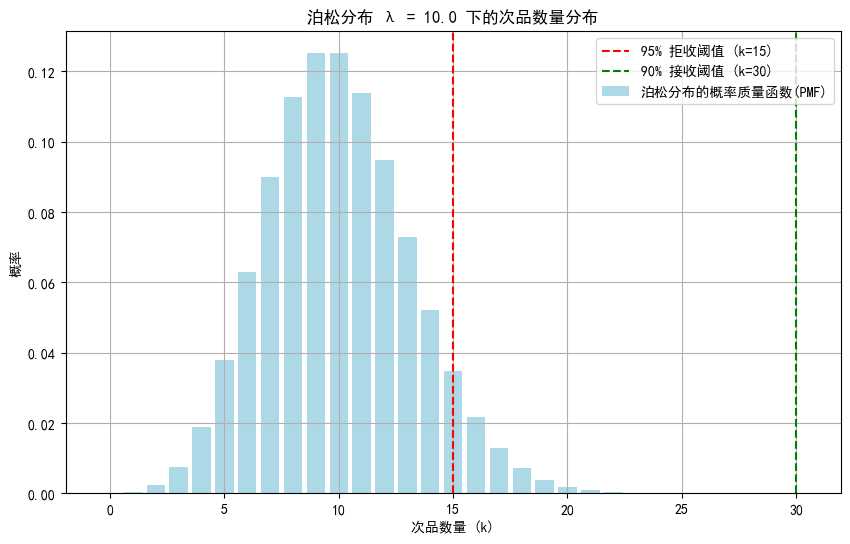

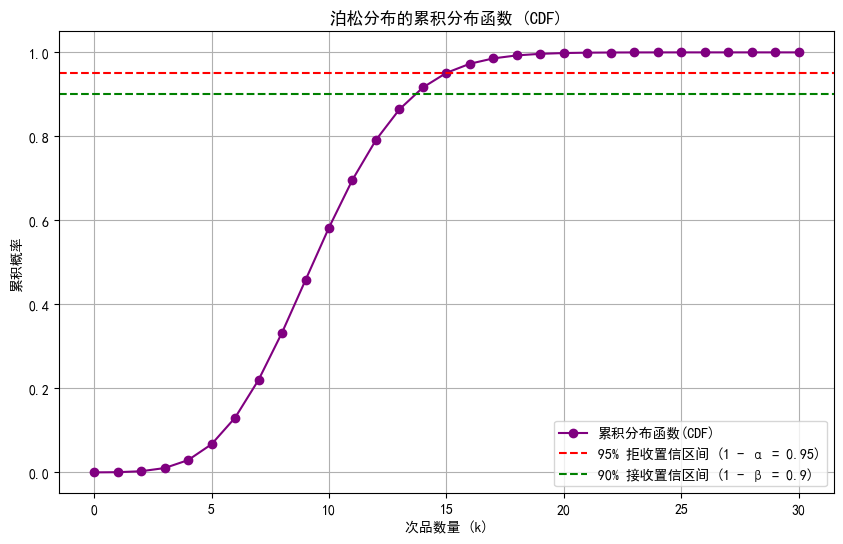

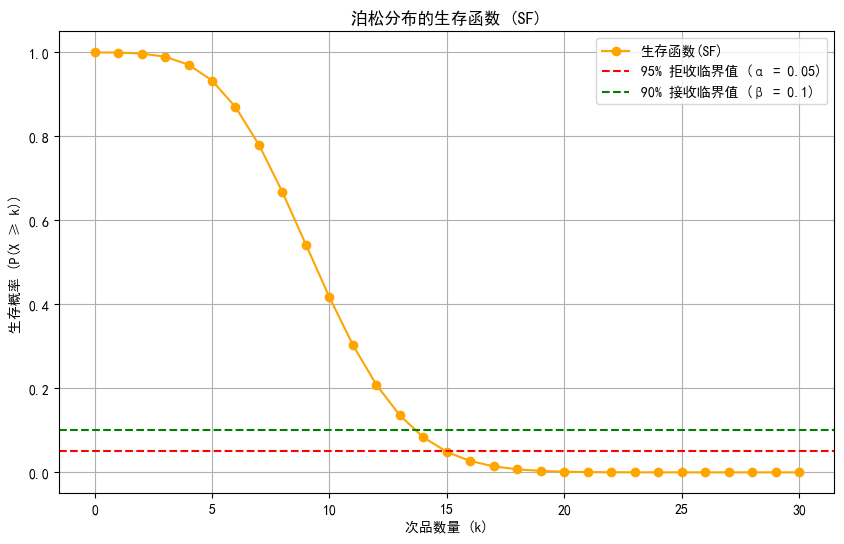

In [6]:

# 在上述代码基础上生成相关的可视化图表，如 PMF(概率质量函数) CDF (累积分布函数) 和 SF (生存函数)

# 设置字体为中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 可视化泊松分布的PMF (概率质量函数)
plt.figure(figsize=(10, 6))
plt.bar(k_values, pmf_values, color='lightblue', label='泊松分布的概率质量函数(PMF)')
plt.axvline(reject_95_k, color='red', linestyle='--', label=f'95% 拒收阈值 (k={reject_95_k})')
plt.axvline(accept_90_k, color='green', linestyle='--', label=f'90% 接收阈值 (k={accept_90_k})')

plt.title(f"泊松分布 λ = {lambda_poisson} 下的次品数量分布")
plt.xlabel("次品数量 (k)")
plt.ylabel("概率")
plt.legend()
plt.grid(True)
plt.savefig('PMF.png')
plt.show()


# 可视化 CDF (累积分布函数)
plt.figure(figsize=(10, 6))
plt.plot(k_values, cdf_values, marker='o', color='purple', label='累积分布函数(CDF)')
plt.axhline(1 - alpha_95, color='red', linestyle='--', label=f'95% 拒收置信区间 (1 - α = {1 - alpha_95})')
plt.axhline(1 - beta_90, color='green', linestyle='--', label=f'90% 接收置信区间 (1 - β = {1 - beta_90})')

plt.title("泊松分布的累积分布函数 (CDF)")
plt.xlabel("次品数量 (k)")
plt.ylabel("累积概率")
plt.legend()
plt.grid(True)
plt.savefig('CDF.png')
plt.show()


# 可视化 SF (生存函数)
plt.figure(figsize=(10, 6))
plt.plot(k_values, sf_values, marker='o', color='orange', label='生存函数(SF)')
plt.axhline(alpha_95, color='red', linestyle='--', label=f'95% 拒收临界值 (α = {alpha_95})')
plt.axhline(beta_90, color='green', linestyle='--', label=f'90% 接收临界值 (β = {beta_90})')

plt.title("泊松分布的生存函数 (SF)")
plt.xlabel("次品数量 (k)")
plt.ylabel("生存概率 (P(X ≥ k))")
plt.legend()
plt.grid(True)
plt.savefig('SF.png')
plt.show()


相关可视化图